<a href="https://colab.research.google.com/github/XingGuoFang/COVID19-SEIR-Modeling-Orange-County/blob/main/%E5%9B%BE%E8%A1%A8%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1. Define the SEIR Mathematical Equations
# Think of this as the "Instruction Manual" for the computer
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# 2. Basic Configuration for Aliso Viejo / Orange County
N = 52000            # Total population (OC estimate)
DAYS = 153             # Matching the 153 days of real data we found
t = np.linspace(0, DAYS, DAYS)

# 3. Initial States
# We assume 100 people were exposed and 1 was infected at the start
E0, I0, R0 = 100, 1, 0
S0 = N - E0 - I0 - R0
y0 = [S0, E0, I0, R0]

# 4. Scientific Parameters (Your calibrated values)
beta = 0.25            # Transmission rate
sigma = 1/5            # Incubation rate (5 days)
gamma = 1/10           # Recovery rate (10 days)

# 5. Run the Simulation
# This is where we use the 'seir_model' defined above
res_a = odeint(seir_model, y0, t, args=(N, beta, sigma, gamma))

print("Success! The simulation is complete and 'res_a' is now stored in memory.")

Success! The simulation is complete and 'res_a' is now stored in memory.


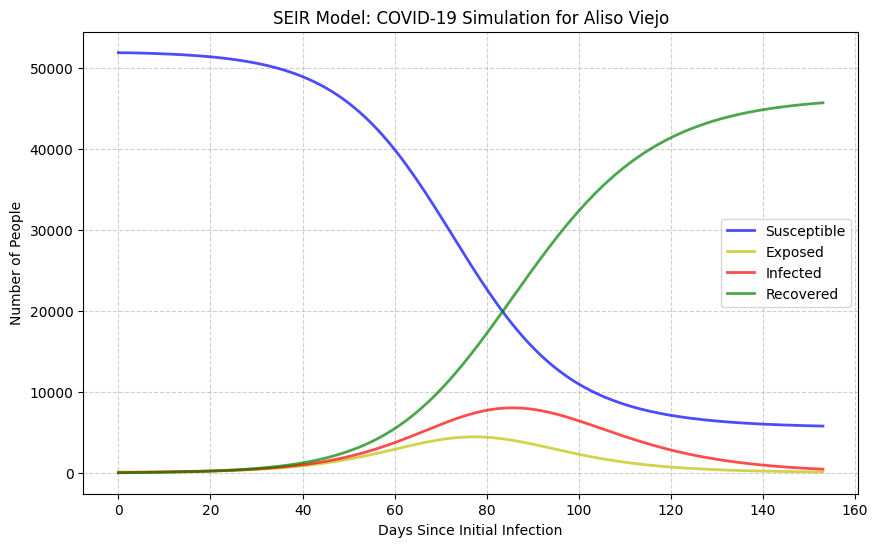

In [9]:
# 1. Unpack the results from the simulation matrix
S, E, I, R = res_a.T

# 2. Start Plotting
plt.figure(figsize=(10, 6))

# Plotting each compartment with professional English labels
plt.plot(t, S, 'b', alpha=0.7, lw=2, label='Susceptible')
plt.plot(t, E, 'y', alpha=0.7, lw=2, label='Exposed')
plt.plot(t, I, 'r', alpha=0.7, lw=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, lw=2, label='Recovered')

# 3. Add Professional Chart Elements
plt.title("SEIR Model: COVID-19 Simulation for Aliso Viejo")
plt.xlabel("Days Since Initial Infection")
plt.ylabel("Number of People")
plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)

# 4. Display the Final Result
plt.show()

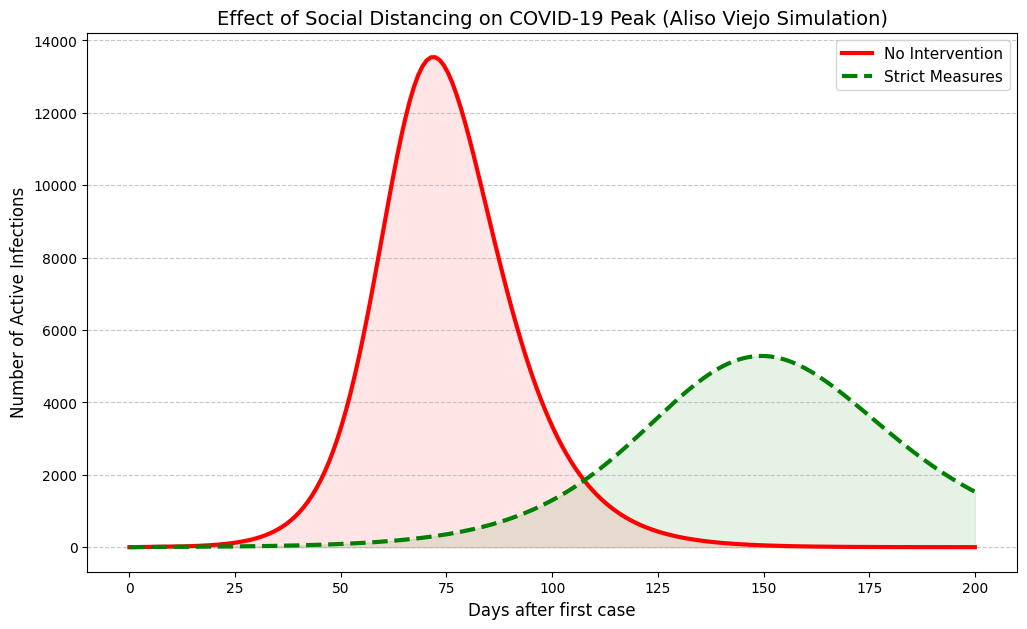

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# 1. Define the SEIR Mathematical Model
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# 2. Set Initial Conditions (Aliso Viejo Scale: N = 52,000)
N = 52000
t = np.linspace(0, 200, 200)  # Simulation for 200 days
y0 = [N-11, 10, 1, 0]         # Initial S, E, I, R
sigma = 1/5                   # Incubation period: 5 days
gamma = 1/10                  # Recovery period: 10 days

# 3. Run Two Different Scenarios
# Scenario A: No Intervention (High Transmission Rate)
beta_high = 0.4
res_high = odeint(seir_model, y0, t, args=(N, beta_high, sigma, gamma))

# Scenario B: Strict Measures (Transmission reduced by 50%)
beta_low = 0.2
res_low = odeint(seir_model, y0, t, args=(N, beta_low, sigma, gamma))

# 4. Extract Infected (I) Data for Comparison
I_high = res_high[:, 2]
I_low = res_low[:, 2]

# 5. Visualization
plt.figure(figsize=(12, 7))

# Plotting the lines
plt.plot(t, I_high, 'r', lw=3, label='No Intervention')
plt.plot(t, I_low, 'g--', lw=3, label='Strict Measures')

# Fill areas for better visualization (Flattening the Curve)
plt.fill_between(t, I_high, color='red', alpha=0.1)
plt.fill_between(t, I_low, color='green', alpha=0.1)

# Add Titles and Labels
plt.title("Effect of Social Distancing on COVID-19 Peak (Aliso Viejo Simulation)", fontsize=14)
plt.xlabel("Days after first case", fontsize=12)
plt.ylabel("Number of Active Infections", fontsize=12)

# Formatting the Chart
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the result
plt.show()

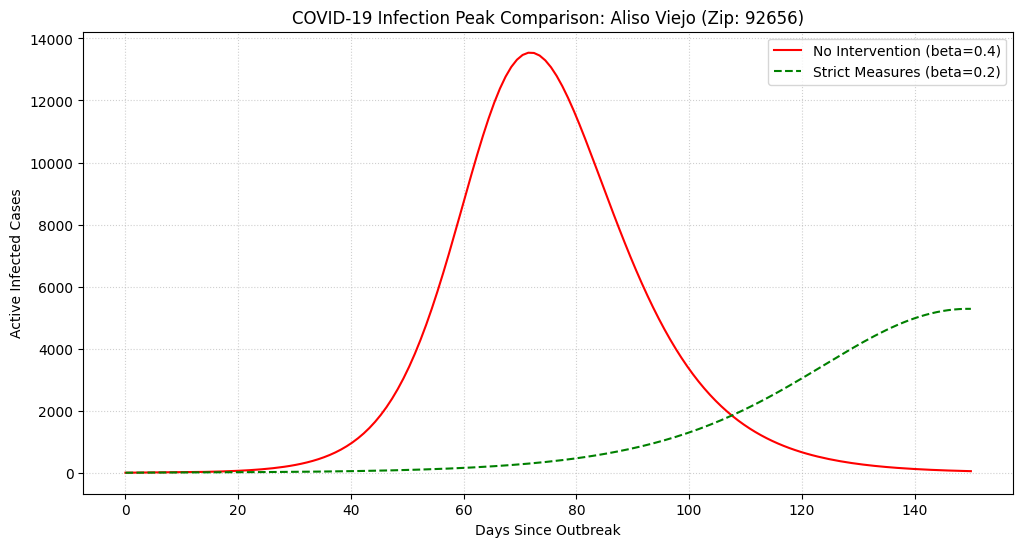

Scenario A Peak Cases: 13539
Scenario B Peak Cases: 5283


In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# =============================================================
# Section 1: Experimental Parameters (Edit values here)
# =============================================================
CITY_NAME = "Aliso Viejo (Zip: 92656)"
N = 52000                # Total Population
DAYS = 150               # Simulation Duration (Days)
INITIAL_E = 10           # Initial Exposed cases
INITIAL_I = 1            # Initial Infected cases

# Scientific Parameters (Based on CDC data)
SIGMA = 1/5              # Incubation rate (Assumes 5-day period)
GAMMA = 1/10             # Recovery rate (Assumes 10-day period)

# Scenario Comparison: Two different Transmission Rates (Beta)
BETA_NO_MASK = 0.4       # Scenario A: No masks / No social distancing
BETA_WITH_MASK = 0.2     # Scenario B: Strict interventions
# =============================================================

# Define Mathematical Model (SEIR Equations)
def seir_model(y, t, N, beta, sigma, gamma):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - sigma * E
    dIdt = sigma * E - gamma * I
    dRdt = gamma * I
    return [dSdt, dEdt, dIdt, dRdt]

# Simulation Execution
t = np.linspace(0, DAYS, DAYS)
y0 = [N - INITIAL_E - INITIAL_I, INITIAL_E, INITIAL_I, 0]

# Run Scenario A (No Intervention)
res_a = odeint(seir_model, y0, t, args=(N, BETA_NO_MASK, SIGMA, GAMMA))
# Run Scenario B (Strict Measures)
res_b = odeint(seir_model, y0, t, args=(N, BETA_WITH_MASK, SIGMA, GAMMA))

# Visualization Zone
plt.figure(figsize=(12, 6))

# Plotting the Active Infected column (index 2) for both scenarios
plt.plot(t, res_a[:, 2], 'r-', label=f'No Intervention (beta={BETA_NO_MASK})')
plt.plot(t, res_b[:, 2], 'g--', label=f'Strict Measures (beta={BETA_WITH_MASK})')

# Formatting the Chart
plt.title(f"COVID-19 Infection Peak Comparison: {CITY_NAME}")
plt.xlabel("Days Since Outbreak")
plt.ylabel("Active Infected Cases")
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

# Print Numerical Results
print(f"Scenario A Peak Cases: {int(max(res_a[:, 2]))}")
print(f"Scenario B Peak Cases: {int(max(res_b[:, 2]))}")